In [1]:
import pandas as pd

# Load the dataset
btc_data = pd.read_csv("/content/btc_dataset.csv")

# Display the first few rows of the dataset to understand its structure
btc_data.head()


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1686268800,09/06/2023 00:00,BTC/USD,26507.0,26522.0,26493.0,26493.0,14.065790,3.726450e+05
1,1686265200,08/06/2023 23:00,BTC/USD,26547.0,26565.0,26498.0,26510.0,13.001130,3.446599e+05
2,1686261600,08/06/2023 22:00,BTC/USD,26571.0,26609.0,26536.0,26554.0,29.344521,7.792144e+05
3,1686258000,08/06/2023 21:00,BTC/USD,26644.0,26651.0,26555.0,26577.0,41.871368,1.112815e+06
4,1686254400,08/06/2023 20:00,BTC/USD,26537.0,26653.0,26522.0,26643.0,110.133306,2.934282e+06


In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Extract 'close' prices
prices = btc_data['close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
normalized_prices = scaler.fit_transform(prices)

# Define a function to convert data into sequences
def create_sequences(data, seq_length):
    X, y = [], []

    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        X.append(seq[:-1])
        y.append(seq[-1])

    return np.array(X), np.array(y)

# Create sequences with a length of 60 (approx. a month of hourly data)
SEQ_LENGTH = 60
X, y = create_sequences(normalized_prices, SEQ_LENGTH)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((35487, 59, 1), (8872, 59, 1))

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# LSTM Model
lstm_model = Sequential()

lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
1109/1109 [==============================] - 119s 101ms/step - loss: 0.0020 - val_loss: 1.3804e-04
Epoch 2/10
1109/1109 [==============================] - 109s 99ms/step - loss: 8.0979e-04 - val_loss: 5.1965e-04
Epoch 3/10
1109/1109 [==============================] - 109s 98ms/step - loss: 6.4818e-04 - val_loss: 5.6894e-05
Epoch 4/10
1109/1109 [==============================] - 114s 102ms/step - loss: 5.8558e-04 - val_loss: 6.8278e-05
Epoch 5/10
1109/1109 [==============================] - 108s 97ms/step - loss: 5.9100e-04 - val_loss: 7.9851e-05
Epoch 6/10
1109/1109 [==============================] - 112s 101ms/step - loss: 5.6425e-04 - val_loss: 2.1577e-04
Epoch 7/10
1109/1109 [==============================] - 114s 103ms/step - loss: 5.3473e-04 - val_loss: 1.1950e-04
Epoch 8/10
1109/1109 [==============================] - 109s 98ms/step - loss: 5.3699e-04 - val_loss: 1.3454e-04
Epoch 9/10
1109/1109 [==============================] - 110s 99ms/step - loss: 5.1719e-04 - val_

In [5]:
from tensorflow.keras.layers import GRU

# GRU Model
gru_model = Sequential()

gru_model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(50, return_sequences=True))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(50))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1))

gru_model.compile(optimizer='adam', loss='mean_squared_error')
gru_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
1109/1109 [==============================] - 126s 108ms/step - loss: 0.0017 - val_loss: 2.2836e-04
Epoch 2/10
1109/1109 [==============================] - 119s 107ms/step - loss: 7.4380e-04 - val_loss: 1.3644e-04
Epoch 3/10
1109/1109 [==============================] - 124s 112ms/step - loss: 6.2896e-04 - val_loss: 1.0536e-04
Epoch 4/10
1109/1109 [==============================] - 119s 107ms/step - loss: 5.9428e-04 - val_loss: 6.6806e-05
Epoch 5/10
1109/1109 [==============================] - 118s 106ms/step - loss: 5.3757e-04 - val_loss: 7.5693e-05
Epoch 6/10
1109/1109 [==============================] - 119s 107ms/step - loss: 5.2171e-04 - val_loss: 5.3745e-05
Epoch 7/10
1109/1109 [==============================] - 123s 111ms/step - loss: 4.9806e-04 - val_loss: 1.1099e-04
Epoch 8/10
1109/1109 [==============================] - 120s 108ms/step - loss: 5.0251e-04 - val_loss: 5.6551e-05
Epoch 9/10
1109/1109 [==============================] - 120s 108ms/step - loss: 4.8047e-04 -

In [9]:
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, MultiHeadAttention, LayerNormalization
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(X_train.shape[1], 1))

# Embedding layer (analogous to positional encoding in NLP transformers)
embedding = Dense(128, activation='relu')(input_layer)

# Transformer block
# For self-attention, query, key, and value are the same.
query = embedding
key = embedding
value = embedding

attention_output = MultiHeadAttention(num_heads=4, key_dim=128)(query=query, key=key, value=value)
attention_output = Dropout(0.2)(attention_output)
attention_output = LayerNormalization(input_shape=(X_train.shape[1], 128))(attention_output + embedding)

# Flatten and feed to a dense layer
flat = Flatten()(attention_output)
dense_1 = Dense(64, activation='relu')(flat)
dropout = Dropout(0.2)(dense_1)
output = Dense(1)(dropout)

# Compile the model
transformer_model = Model(inputs=input_layer, outputs=output)
transformer_model.compile(optimizer='adam', loss='mean_squared_error')
transformer_model.summary()

# Training the Model
transformer_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 59, 1)]              0         []                            
                                                                                                  
 dense_6 (Dense)             (None, 59, 128)              256       ['input_3[0][0]']             
                                                                                                  
 multi_head_attention (Mult  (None, 59, 128)              263808    ['dense_6[0][0]',             
 iHeadAttention)                                                     'dense_6[0][0]',             
                                                                     'dense_6[0][0]']             
                                                                                            

In [7]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(X_train.shape[1], 1))

# Flatten the input data
flattened_input = Flatten()(input_layer)

# First dense layer
dense_1 = Dense(128, activation='relu')(flattened_input)
dense_1 = Dropout(0.2)(dense_1)

# Second dense layer
dense_2 = Dense(64, activation='relu')(dense_1)
dense_2 = Dropout(0.2)(dense_2)

# Output layer
output = Dense(1)(dense_2)

# Compile the FNN Model
fnn_model = Model(inputs=input_layer, outputs=output)
fnn_model.compile(optimizer='adam', loss='mean_squared_error')
fnn_model.summary()

# Train the FNN Model
fnn_history = fnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 59, 1)]           0         
                                                                 
 flatten (Flatten)           (None, 59)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               7680      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 65    

In [13]:
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
gru_history = gru_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
fnn_history = fnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
transformer_history = transformer_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
1109/1109 [==============================] - 117s 105ms/step - loss: 5.1643e-04 - val_loss: 6.1574e-05
Epoch 2/10
1109/1109 [==============================] - 118s 107ms/step - loss: 5.0269e-04 - val_loss: 8.4584e-05
Epoch 3/10
1109/1109 [==============================] - 114s 103ms/step - loss: 5.1682e-04 - val_loss: 5.7349e-05
Epoch 4/10
1109/1109 [==============================] - 112s 101ms/step - loss: 5.1225e-04 - val_loss: 4.0059e-05
Epoch 5/10
1109/1109 [==============================] - 113s 102ms/step - loss: 5.1153e-04 - val_loss: 4.4265e-05
Epoch 6/10
1109/1109 [==============================] - 117s 106ms/step - loss: 4.9800e-04 - val_loss: 6.2856e-05
Epoch 7/10
1109/1109 [==============================] - 112s 101ms/step - loss: 4.8220e-04 - val_loss: 9.9181e-05
Epoch 8/10
1109/1109 [==============================] - 117s 105ms/step - loss: 4.7731e-04 - val_loss: 1.7690e-04
Epoch 9/10
1109/1109 [==============================] - 113s 102ms/step - loss: 4.8682e-

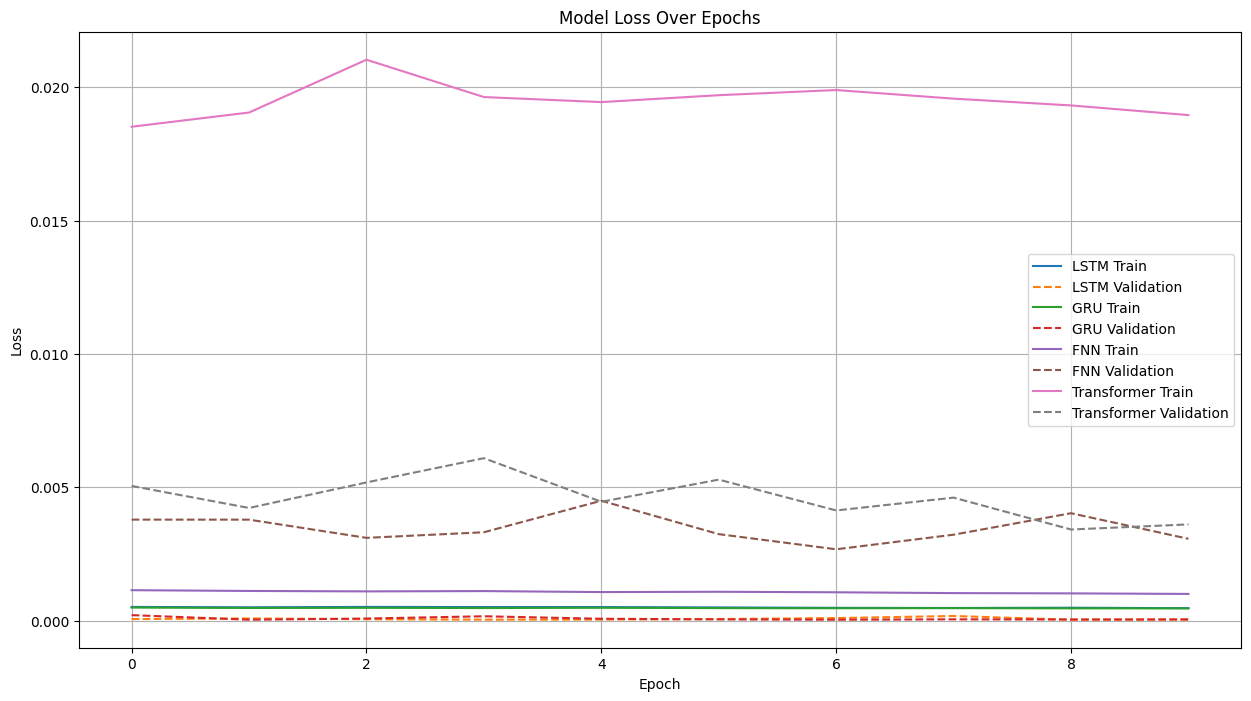

In [14]:
import matplotlib.pyplot as plt

# Extract history objects for each model
histories = {
    "LSTM": lstm_history,
    "GRU": gru_history,
    "FNN": fnn_history,
    "Transformer": transformer_history
}

plt.figure(figsize=(15, 8))

# Plot training & validation loss values for each model
for model_name, history in histories.items():
    plt.plot(history.history['loss'], label=f'{model_name} Train')
    plt.plot(history.history['val_loss'], label=f'{model_name} Validation', linestyle='--')

plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()



In [15]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def compute_metrics(true_values, predicted_values):
    mse = mean_squared_error(true_values, predicted_values)
    mae = mean_absolute_error(true_values, predicted_values)
    rmse = np.sqrt(mse)
    r2 = r2_score(true_values, predicted_values)
    return mse, mae, rmse, r2

# Assuming 'actual_prices' and predictions from each model are correctly defined:
# Compute metrics for each model
lstm_metrics = compute_metrics(actual_prices, lstm_predictions_actual)
gru_metrics = compute_metrics(actual_prices, gru_predictions_actual)
fnn_metrics = compute_metrics(actual_prices, fnn_predictions_actual)
transformer_metrics = compute_metrics(actual_prices, transformer_predictions_actual)

# Display the metrics
metrics_names = ["MSE", "MAE", "RMSE", "R2"]
model_names = ["LSTM", "GRU", "FNN", "Transformer"]
all_metrics = [lstm_metrics, gru_metrics, fnn_metrics, transformer_metrics]

for i, model_name in enumerate(model_names):
    print(f"{model_name} Metrics:")
    for j, metric_name in enumerate(metrics_names):
        print(f"{metric_name}: {all_metrics[i][j]}")
    print("\n")

# Store metrics for each model in a dictionary
models_metrics = {
    "LSTM": lstm_metrics,
    "GRU": gru_metrics,
    "FNN": fnn_metrics,
    "Transformer": transformer_metrics
}

# Determine the best model for each metric
best_model_per_metric = {}
for i, metric_name in enumerate(metrics_names):
    best_model = min(models_metrics, key=lambda model: models_metrics[model][i])
    best_model_per_metric[metric_name] = best_model

# Print best model for each metric
for metric, model in best_model_per_metric.items():
    print(f"Best model based on {metric}: {model}")

# Conclude with an overall best model
from collections import Counter
counter = Counter(best_model_per_metric.values())
overall_best_model = counter.most_common(1)[0][0]

print(f"\nOverall best model for predicting BTC price is: {overall_best_model}")


LSTM Metrics:
MSE: 4.715643920346276e-05
MAE: 0.004715289751062479
RMSE: 0.006867054623596842
R2: 0.9992703545367363


GRU Metrics:
MSE: 8.824465616688944e-05
MAE: 0.006460473386885881
RMSE: 0.009393862686184497
R2: 0.9986346018885855


FNN Metrics:
MSE: 0.0007153856350348298
MAE: 0.02159938293487157
RMSE: 0.026746693908496984
R2: 0.9889309309204821


Transformer Metrics:
MSE: 0.005164714661019725
MAE: 0.06124758270259811
RMSE: 0.07186594924593792
R2: 0.9200870403890026


Best model based on MSE: LSTM
Best model based on MAE: LSTM
Best model based on RMSE: LSTM
Best model based on R2: Transformer

Overall best model for predicting BTC price is: LSTM


In [18]:
#simple average ensembling

# Average the predictions
average_predictions = (lstm_predictions_actual + gru_predictions_actual + fnn_predictions_actual + transformer_predictions_actual) / 4.0


In [20]:
#Weighted Average Ensemble Model:
# Calculate weights based on MSE
total_mse = lstm_mse + gru_mse + fnn_mse + transformer_mse
lstm_weight = lstm_mse / total_mse
gru_weight = gru_mse / total_mse
fnn_weight = fnn_mse / total_mse
transformer_weight = transformer_mse / total_mse

# Compute the weighted average
weighted_predictions = (lstm_predictions_actual * lstm_weight +
                        gru_predictions_actual * gru_weight +
                        fnn_predictions_actual * fnn_weight +
                        transformer_predictions_actual * transformer_weight)


In [22]:
#Stacked Ensemble Model:
from sklearn.linear_model import LinearRegression
# Get the base models' predictions on the training data
lstm_train_pred = lstm_model.predict(X_train)
gru_train_pred = gru_model.predict(X_train)
fnn_train_pred = fnn_model.predict(X_train)
transformer_train_pred = transformer_model.predict(X_train)

# Stack predictions together
stacked_train_predictions = np.column_stack((lstm_train_pred, gru_train_pred, fnn_train_pred, transformer_train_pred))
stacked_test_predictions = np.column_stack((lstm_predictions, gru_predictions, fnn_predictions, transformer_predictions))

# Train the meta-model
meta_model = LinearRegression()
meta_model.fit(stacked_train_predictions, y_train)

# Get final predictions
stacked_final_predictions = meta_model.predict(stacked_test_predictions)


1109/1109 [==============================] - 54s 49ms/step


In [23]:
#Performance Comparison

# Compute metrics for each ensemble model
weighted_avg_metrics = compute_metrics(actual_prices, weighted_predictions)
stacked_metrics = compute_metrics(actual_prices, stacked_final_predictions)
simple_avg_metrics = compute_metrics(actual_prices, average_predictions)

# Display the metrics
ensemble_names = ["Weighted Average", "Stacked Ensemble", "Simple Average"]
all_ensemble_metrics = [weighted_avg_metrics, stacked_metrics, simple_avg_metrics]

for i, ensemble_name in enumerate(ensemble_names):
    print(f"{ensemble_name} Metrics:")
    for j, metric_name in enumerate(metrics_names):
        print(f"{metric_name}: {all_ensemble_metrics[i][j]}")
    print("\n")

# Determine the best ensemble model for each metric
ensemble_metrics = {
    "Weighted Average": weighted_avg_metrics,
    "Stacked Ensemble": stacked_metrics,
    "Simple Average": simple_avg_metrics
}

best_ensemble_per_metric = {}
for i, metric_name in enumerate(metrics_names):
    best_ensemble = min(ensemble_metrics, key=lambda ensemble: ensemble_metrics[ensemble][i])
    best_ensemble_per_metric[metric_name] = best_ensemble

# Print best ensemble model for each metric
for metric, ensemble in best_ensemble_per_metric.items():
    print(f"Best ensemble model based on {metric}: {ensemble}")

# Conclude with an overall best ensemble model
counter = Counter(best_ensemble_per_metric.values())
overall_best_ensemble = counter.most_common(1)[0][0]

print(f"\nOverall best ensemble model for predicting BTC price is: {overall_best_ensemble}")


Weighted Average Metrics:
MSE: 0.004179507967432859
MAE: 0.05506143208238356
RMSE: 0.06464911420454932
R2: 0.9353310156868648


Stacked Ensemble Metrics:
MSE: 6.897641985600208e-05
MAE: 0.0056528373745633785
RMSE: 0.00830520438375854
R2: 0.9989327368081597


Simple Average Metrics:
MSE: 0.0006779639791250311
MAE: 0.021958762279201634
RMSE: 0.02603774143671127
R2: 0.9895099513453406


Best ensemble model based on MSE: Stacked Ensemble
Best ensemble model based on MAE: Stacked Ensemble
Best ensemble model based on RMSE: Stacked Ensemble
Best ensemble model based on R2: Weighted Average

Overall best ensemble model for predicting BTC price is: Stacked Ensemble


In [30]:
from tensorflow.keras.models import save_model
from joblib import dump

# Save base models
save_model(lstm_model, 'lstm_model.h5')
save_model(gru_model, 'gru_model.h5')
save_model(fnn_model, 'fnn_model.h5')
save_model(transformer_model, 'transformer_model.h5')

# Save the meta-model
dump(meta_model, 'meta_model.joblib')


<ipython-input-30-44ef7ec33fb2>:5: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(lstm_model, 'lstm_model.h5')
<ipython-input-30-44ef7ec33fb2>:6: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(gru_model, 'gru_model.h5')
<ipython-input-30-44ef7ec33fb2>:7: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(fnn_model, 'fnn_model.h5')
<ipython-input-30-44ef7ec33fb2>:8: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend us

['meta_model.joblib']

In [31]:
from tensorflow.keras.models import load_model
from joblib import load

# Load base models
lstm_model = load_model('lstm_model.h5')
gru_model = load_model('gru_model.h5')
fnn_model = load_model('fnn_model.h5')
transformer_model = load_model('transformer_model.h5')

# Load the meta-model
meta_model = load('meta_model.joblib')


Epoch 1/10
1109/1109 [==============================] - 11s 8ms/step - loss: 0.0023 - val_loss: 1.9590e-04
Epoch 2/10
1109/1109 [==============================] - 3s 3ms/step - loss: 4.8401e-05 - val_loss: 8.2513e-05
Epoch 3/10
1109/1109 [==============================] - 3s 2ms/step - loss: 4.9713e-05 - val_loss: 8.2011e-05
Epoch 4/10
1109/1109 [==============================] - 2s 2ms/step - loss: 4.8862e-05 - val_loss: 6.6357e-05
Epoch 5/10
1109/1109 [==============================] - 3s 2ms/step - loss: 5.2384e-05 - val_loss: 1.3324e-04
Epoch 6/10
1109/1109 [==============================] - 2s 2ms/step - loss: 4.9586e-05 - val_loss: 4.4248e-05
Epoch 7/10
1109/1109 [==============================] - 3s 3ms/step - loss: 5.0142e-05 - val_loss: 5.5952e-05
Epoch 8/10
1109/1109 [==============================] - 2s 2ms/step - loss: 4.8910e-05 - val_loss: 1.1056e-04
Epoch 9/10
1109/1109 [==============================] - 2s 2ms/step - loss: 4.8899e-05 - val_loss: 8.7149e-05
Epoch 10/10
1

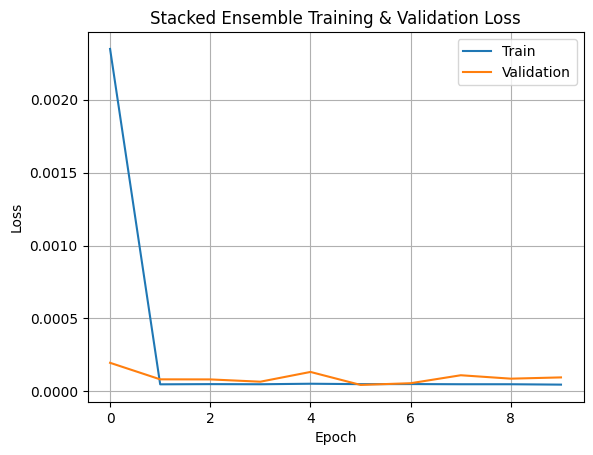

In [36]:
# Extract history objects for each ensemble model

# This study will only have a history object for ensemble methods that involve a training phase that is stack ensemble model
# For the weighted average and simple average ensemble methods, there's no training, so there won't have a history object for them.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define a simple neural network as the meta-model
meta_model = Sequential([
    Dense(32, activation='relu', input_shape=(stacked_train_predictions.shape[1],)),
    Dense(1)
])

meta_model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Train the meta-model
stacked_history = meta_model.fit(stacked_train_predictions, y_train, epochs=10, batch_size=32, validation_data=(stacked_test_predictions, y_test))

# Plot the loss curve
import matplotlib.pyplot as plt

plt.plot(stacked_history.history['loss'], label='Train')
plt.plot(stacked_history.history['val_loss'], label='Validation')
plt.title('Stacked Ensemble Training & Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

